In [1]:
import plumed
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/amritagos/micromamba/envs/plumedenv/lib/libplumedKernel.so" +++
/tmp/ipykernel_358563/2681159695.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  colvar = plumed.read_as_pandas(str(colvar_file))


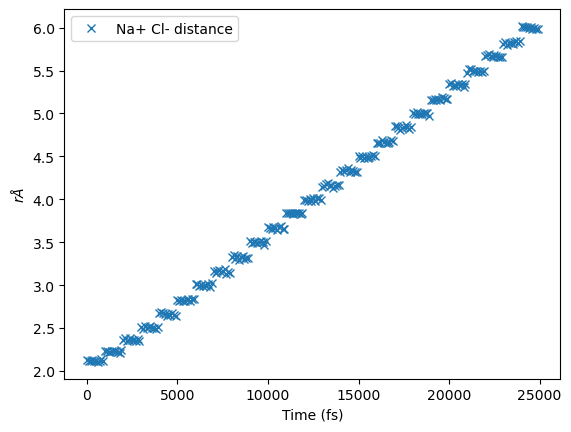

In [2]:
# Assume that the results directory has been created 
colvar_file = Path("../results/wham_3/bias_multi.dat")
dump_frequency = 100 # Frames written out every 100 time steps. Each timestep is 1 fs
colvar = plumed.read_as_pandas(str(colvar_file))
times = colvar.time*dump_frequency # in fs 

fig, ax = plt.subplots()
ax.plot(times,colvar.d1, "x", label="Na+ Cl- distance")
ax.set_xlabel("Time (fs)")
ax.set_ylabel(r"$r$ ($\AA$)")
ax.legend()
plt.show()

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/amritagos/micromamba/envs/plumedenv/lib/libplumedKernel.so" +++
/tmp/ipykernel_358563/1540942905.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fes_d1_biased = plumed.read_as_pandas(str(fes_file_biased)).replace([np.inf, -np.inf], np.nan).dropna()
/tmp/ipykernel_358563/1540942905.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fes_d1_reweighted = plumed.read_as_pandas(str(fes_file_reweighted)).replace([np.inf, -np.inf], np.nan).dropna()
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/amritagos/micromamba/envs/plumedenv/lib/libplumedKernel.so" +++


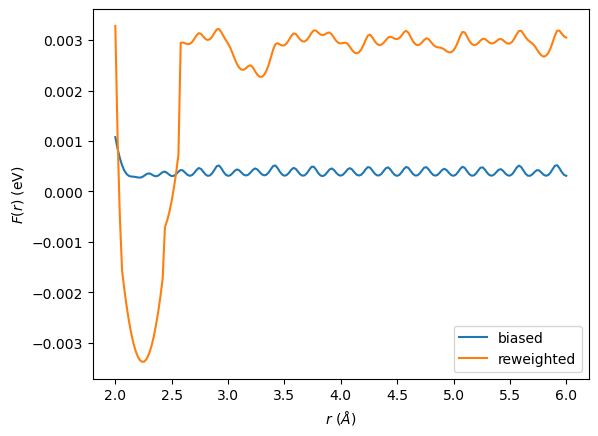

In [6]:
from ase import units 

fes_file_biased = Path("../results/wham_3/fes_d1_cat.dat")
fes_file_reweighted = Path("../results/wham_3/fes_d1_catr.dat")

fes_d1_biased = plumed.read_as_pandas(str(fes_file_biased)).replace([np.inf, -np.inf], np.nan).dropna()
fes_d1_reweighted = plumed.read_as_pandas(str(fes_file_reweighted)).replace([np.inf, -np.inf], np.nan).dropna()

fig, ax = plt.subplots()
ax.plot(fes_d1_biased.d1,fes_d1_biased.ffd1*1/(units.kcal / units.mol),label="biased")
ax.plot(fes_d1_reweighted.d1,fes_d1_reweighted.ffd1r*1/(units.kcal / units.mol),label="reweighted")
ax.set_xlabel(r"$r$ ($\AA$)")
ax.set_ylabel(r"$F(r)$ (kcal/mol)")
ax.legend()
plt.show()